<a href="https://colab.research.google.com/github/shaurink98/Cluster-Analysis/blob/main/World%20Indicators%20Cluster%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET CLEANSING

In [ ]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np


In [ ]:
worldi = pd.read_csv('World Indicators.csv') 

In [ ]:
worldi

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
worldi.dtypes

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object



Addressing the Missing Values in the Dataset

In [ ]:
#taking an insight on the number of missing values in the dataset
worldi.isna().sum().sort_values(ascending=False)


Lending Interest          77
Energy Usage              72
Hours to do Tax           28
Days to Start Business    27
Business Tax Rate         27
Health Exp % GDP          23
Health Exp/Capita         23
GDP                       20
Infant Mortality Rate     20
Population 15-64          17
Population 65+            17
Population 0-14           17
Mobile Phone Usage        12
Life Expectancy Female    11
Life Expectancy Male      11
Birth Rate                 9
Internet Usage             9
Population Urban           2
Region                     0
Country                    0
dtype: int64

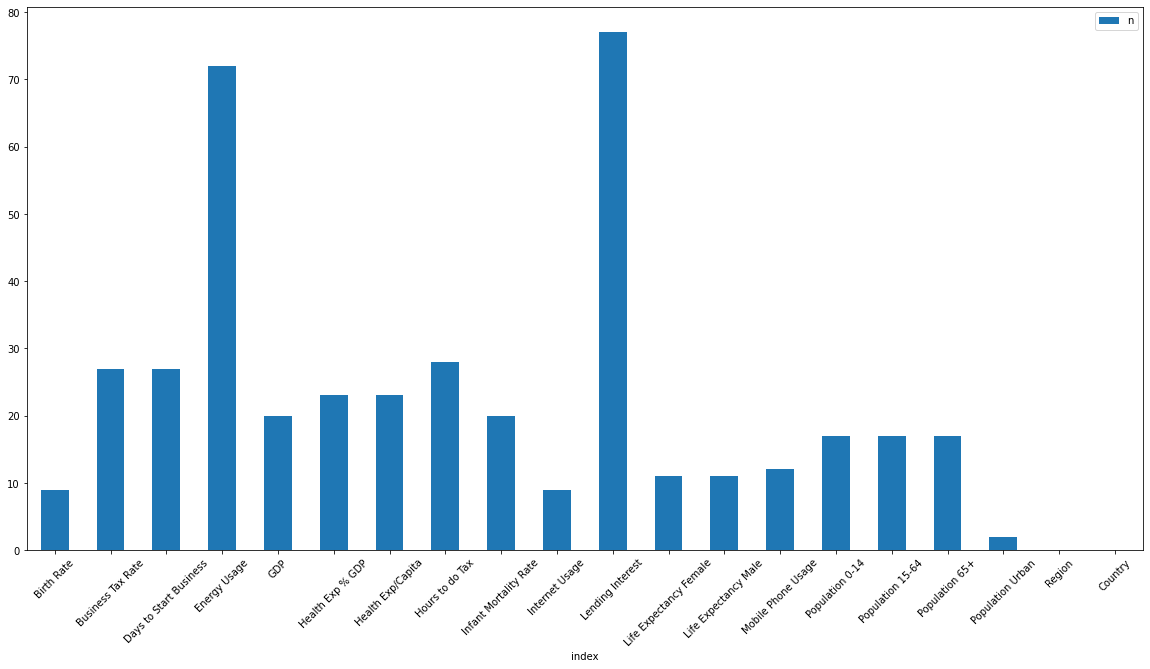

In [ ]:
worldi.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45, figsize=(20, 10))

As clear lt is evident through the code. We can see that the columns ' Energy Usage' and 'Lending Interest' have the highest number of missing values. It would make much more sense to remove these values as keeping the columns and filtering out NA values would lead us to the loss of approx 50-60% of the dataset. Thus getting rid of the two columns in its entirety makes more sense


In [ ]:
worldi = worldi.drop(columns=['Energy Usage','Lending Interest'])

In [ ]:
worldi.head(5)

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
worldi.dtypes

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [ ]:
worldi['GDP']=worldi['GDP'].str.replace(',', '', regex=True)
worldi['Health Exp/Capita']=worldi['Health Exp/Capita'].str.replace(',', '', regex=True)

worldi.head(20)


,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,$199070864638,0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,$104115863405,0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,$7294900431,0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,$15292424757,0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,$10395757480,0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
5,0.045,51.6%,13.0,$2355652064,0.090,$21,274.0,0.059,0.0,55.0,51.0,0.2,0.440,0.535,0.025,0.109,Africa,Burundi
6,0.038,48.8%,15.0,$25486923059,0.054,$64,654.0,0.064,0.1,55.0,53.0,0.5,0.432,0.535,0.032,0.521,Africa,Cameroon
7,0.035,54.6%,22.0,$2195599491,0.039,$19,504.0,0.100,0.0,51.0,47.0,0.2,0.404,0.558,0.039,0.390,Africa,Central African Republic
8,0.047,75.8%,55.0,$12156380062,0.028,$25,732.0,0.092,0.0,51.0,49.0,0.3,0.487,0.488,0.025,0.220,Africa,Chad
9,0.036,217.9%,22.0,$610372697,0.036,$31,100.0,0.061,0.1,62.0,59.0,0.3,0.422,0.549,0.029,0.280,Africa,Comoros


In [ ]:
#getting rid of the $ and , sign 
worldi['Business Tax Rate']=worldi['Business Tax Rate'].str.replace('%', '', regex=True)

worldi['GDP']=worldi['GDP'].str.replace('$', '', regex=True)

worldi['Health Exp/Capita']=worldi['Health Exp/Capita'].str.replace('$', '', regex=True)

worldi.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
#Converting the object type data into float type data
worldi['Business Tax Rate']=worldi['Business Tax Rate'].astype(float)
worldi['GDP']=worldi['GDP'].astype(float)
worldi['Health Exp/Capita']=worldi['Health Exp/Capita'].astype(float)

In [ ]:
worldi[worldi.duplicated()]

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country


In [ ]:
worldi.duplicated().any()

False

In [ ]:
worldi.isna().sum().sort_values(ascending=False)

Hours to do Tax           28
Days to Start Business    27
Business Tax Rate         27
Health Exp % GDP          23
Health Exp/Capita         23
GDP                       20
Infant Mortality Rate     20
Population 15-64          17
Population 65+            17
Population 0-14           17
Mobile Phone Usage        12
Life Expectancy Female    11
Life Expectancy Male      11
Birth Rate                 9
Internet Usage             9
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [ ]:
worldi = worldi.dropna()

In [ ]:
worldi

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4.363219e+09,0.060,490.0,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
202,0.015,29.1,41.0,2.367635e+10,0.053,935.0,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


After dropping the missing values **we are left with 171 columns.** Thus in total we dropeed 37 rows from the original datase. **Accounting upto 18% of the data set.**<br>

In [ ]:
scaler = MinMaxScaler() 
new_worldi_drop = worldi.drop(columns=['Region','Country'])
new_worldi = pd.DataFrame(scaler.fit_transform(new_worldi_drop.values), columns=new_worldi_drop.columns, index=new_worldi_drop.index)
new_worldi

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077
202,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000
204,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340
205,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724


In [ ]:
new_worldi.info

In [ ]:
# new_worldi['Country'] = worldi['Country']
# new_worldi

## K Means on the World Data

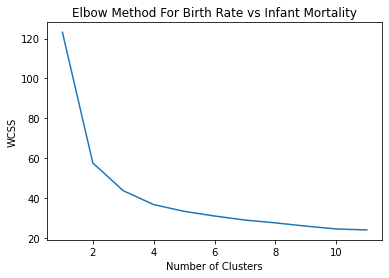

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []                      #within cluster sum of square 
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_worldi)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12), wcss)
plt.title("Elbow Method For Birth Rate vs Infant Mortality")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
new_worldi_kmeans = kmeans.fit_predict(new_worldi)
new_worldi_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### CH Score for Kmeans

In [ ]:
labels = kmeans.labels_
print(metrics.calinski_harabasz_score(new_worldi, labels))

192.54525050508803


In [ ]:
!pip install validclust           #installing validclust package for calculation of Dunn Index

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dunn Index for Kmeans

In [ ]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist_All = pairwise_distances(new_worldi)
dunn_All = dunn(dist_All,labels)
print('DI All Data: '+ str(dunn_All))

DI All Data: 0.12192108167876109


### Silhouette Score 

In [ ]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
#SK1 = range(2,11)
sil_score = []
for i in range(2,11):
    labels2=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(new_worldi).labels_
    score = metrics.silhouette_score(new_worldi,labels2,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(new_worldi,labels2,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.42987453131766545
Silhouette score for k(clusters) = 3 is 0.3166762372024751
Silhouette score for k(clusters) = 4 is 0.25872952881238986
Silhouette score for k(clusters) = 5 is 0.23080280242640555
Silhouette score for k(clusters) = 6 is 0.24055588982224269
Silhouette score for k(clusters) = 7 is 0.20451788152517777
Silhouette score for k(clusters) = 8 is 0.1995592430451238
Silhouette score for k(clusters) = 9 is 0.19498677290560198
Silhouette score for k(clusters) = 10 is 0.21152668221422402


## Hierarchial Clustering on World Data

Text(0, 0.5, 'EucLidean distance')

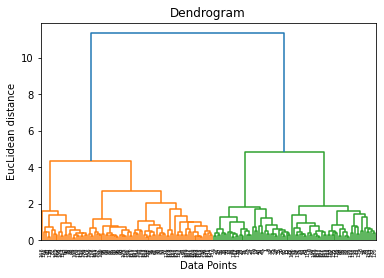

In [ ]:
#Dendogram
from scipy.cluster.hierarchy import dendrogram , linkage
dend = dendrogram(linkage(new_worldi , method= 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('EucLidean distance')

### Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc_task2 = AgglomerativeClustering(n_clusters = 2 , affinity= 'euclidean', linkage='ward')

y = hc_task2.fit_predict(new_worldi)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

###CH score

In [ ]:
labels = hc_task2.labels_
print(metrics.calinski_harabasz_score(new_worldi, labels))

184.87996192103543


### Dunn Index 

In [ ]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
dist_hc = pairwise_distances(new_worldi)
dunn_hc = dunn(dist_hc,y)
print('DI Dunn Index Hierarchical Data: '+ str(dunn_hc))

DI Dunn Index Hierarchical Data: 0.14142629053178704


### Silhouette

In [ ]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
#SK1 = range(2,11)
sil_score = []
for i in range(2,11):
    labels3=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(new_worldi).labels_
    score = metrics.silhouette_score(new_worldi,labels2,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(new_worldi,labels2,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.21152668221422402
Silhouette score for k(clusters) = 3 is 0.21152668221422402
Silhouette score for k(clusters) = 4 is 0.21152668221422402
Silhouette score for k(clusters) = 5 is 0.21152668221422402
Silhouette score for k(clusters) = 6 is 0.21152668221422402
Silhouette score for k(clusters) = 7 is 0.21152668221422402
Silhouette score for k(clusters) = 8 is 0.21152668221422402
Silhouette score for k(clusters) = 9 is 0.21152668221422402
Silhouette score for k(clusters) = 10 is 0.21152668221422402


In [ ]:
#new_worldi['Cluster Class'] = new_worldi_kmeans.tolist()

new_worldi['Country'] = worldi['Country']
new_worldi

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Country
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933,Algeria
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262,Angola
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630,Benin
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503,Botswana
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077,Suriname
202,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000,Trinidad and Tobago
204,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340,United States
205,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724,Uruguay


In [ ]:
new_worldi['Cluster Class'] = new_worldi_kmeans.tolist()

In [ ]:
new_worldi

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Country,Cluster Class
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933,Algeria,1
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262,Angola,1
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630,Benin,1
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503,Botswana,1
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194,Burkina Faso,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077,Suriname,0
202,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000,Trinidad and Tobago,0
204,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340,United States,0
205,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724,Uruguay,0


##List of Countries Belonging to Diff Cluster

In [ ]:
#Listing Countries belonging to each cluster.
a=new_worldi.groupby('Cluster Class')['Country'].agg(list)
groupcountry=pd.DataFrame(a, columns=['Country'])
groupcountry



,Country
Cluster Class,
0,"[Egypt, Arab Rep., Mauritius, Morocco, Seychel..."
1,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."


In [ ]:
import seaborn as sns

In [ ]:
new_worldi

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Country,Cluster Class
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933,Algeria,1
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262,Angola,1
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630,Benin,1
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503,Botswana,1
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194,Burkina Faso,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077,Suriname,0
202,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000,Trinidad and Tobago,0
204,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340,United States,0
205,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724,Uruguay,0


## BETTER CLUSTERING MODEL 

Based on the CH score value for Kmeans and Hierarchial in the above model, we can see that the CH score for Kmeans is higher than kmeans for hierarchial. In that case we can assume that for this dataset KMEANS is a better clustering method. (NOTE: the difference between the CH score is not that significant)

When comparing the Dunn Index - the values are pretty close in both the clustering cases. 

## Scatter plot for 'Days To Start Business' vs 'GDP'

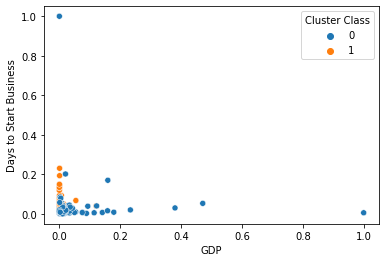

In [ ]:
import seaborn as sns
sns.scatterplot(x='GDP',y='Days to Start Business',hue='Cluster Class',data=new_worldi)
plt.show()

As we can see in the above scatter plot - most of thw countries belonging to cluster 0 who have a slightly better GDP than most countries in Cluster 1, thus taking less time to start business. <br>
This shows that a country with better economy has a much stronger chance of running a business in a short time

## Scatter Plot for 'Life Expectancy Female' vs 'Life Expectancy Male'

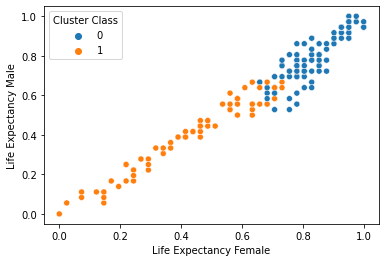

In [ ]:
import seaborn as sns
sns.scatterplot(x='Life Expectancy Female',y='Life Expectancy Male',hue='Cluster Class',data=new_worldi)
plt.show()

As we can see here countries belonging to cluster 0 have a higher expectancy for both the male and Female compared to countries belonging to cluster 1. <br>
Thus, we can come to a conclusion that Countries belonging to Cluster 0 have a better health care sytem and environment for people to live in.


## Scatter Plot for 'Infant Mortality Rate' vs 'GDP'


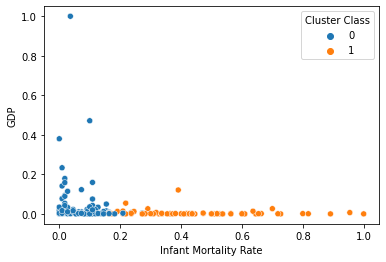

In [ ]:
import seaborn as sns
sns.scatterplot(x='Infant Mortality Rate',y='GDP',hue='Cluster Class',data=new_worldi)
plt.show()

We can see from the above Scatter Plot that countries belonging to class 0 (having higher GDP) have a infant moratlity rate less than 0.2. Whereas countries with lower GDP( Class 1) have an infant mortality rate of 0.2 or more. 
<br>
This clearly depicts the fact that Infant mortality rate is directly proprtoinal to the GDP of a country. Better the GDP, better the Healthcare system in helping the birth of an infant

## Scatter Plot of 'Population Urban' vs 'Country'

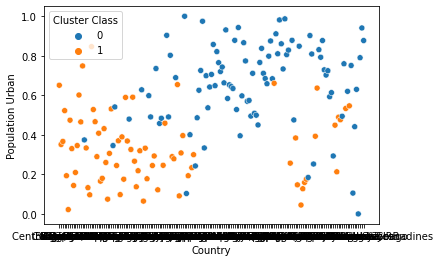

In [ ]:
import seaborn as sns
sns.scatterplot(x='Country',y='Population Urban',hue='Cluster Class',data=new_worldi)
plt.show()

## Scateer plot for 'Internet Usage' vs 'Population 15-64'

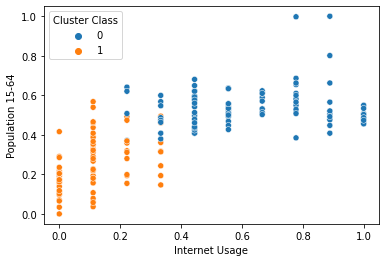

In [ ]:
import seaborn as sns
sns.scatterplot(x='Internet Usage',y='Population 15-64',hue='Cluster Class',data=new_worldi)
plt.show()

In the above scatter plot we can observe that Countries in the Class 0( earler determined to have a higher GDP) have more people in the age group of 15-64 spending much time on internet. 
<br>
Thus implying population from countries belonging to cluster 0 spend much time on internet( working, playing, etc. ) which also is an indirect indication towards the great connectivity that those Nations possess in that cluster